# 1) Basic Analysis

General Analysis,Un-nesting of the Data & Handling of null values

In [181]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('Streamflix.csv')
df.sample(5)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1240,s1241,Movie,Safe Haven,Lasse Hallström,"Josh Duhamel, Julianne Hough, Cobie Smulders, ...",United States,"March 4, 2021",2013,PG-13,116 min,"Dramas, Romantic Movies",When a mysterious woman arrives in a small Nor...
4248,s4249,Movie,Todd Glass: Stand-Up Special,Jay Chapman,Todd Glass,United States,"December 31, 2018",2012,TV-MA,46 min,Stand-Up Comedy,Standup comedian Todd Glass gets right down to...
1507,s1508,Movie,Shaun the Sheep: The Farmer’s Llamas,Jay Grace,"Justin Fletcher, John Sparkes, Sean Connolly, ...",United Kingdom,"December 22, 2020",2020,TV-Y,28 min,"Children & Family Movies, Comedies",A trio of mischievous llamas from the county f...
7102,s7103,Movie,Issaq,Manish Tiwary,"Prateik, Amyra Dastur, Ravi Kishan, Prashant N...",India,"March 1, 2018",2013,TV-MA,140 min,"Dramas, International Movies, Music & Musicals",Two young lovers in Banaras are caught in the ...
3995,s3996,Movie,Alexis Viera: A Story of Surviving,Luis Ara,Alexis Viera,Uruguay,"March 20, 2019",2019,TV-MA,69 min,"Documentaries, International Movies, Sports Mo...",After being shot during a robbery in Colombia ...


In [182]:
df.shape

(8807, 12)

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [184]:
#print(df.describe())
#print('-------------------------------------------------------------------------------')
df.describe(include=object)

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


In [185]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [186]:
df_cast_r = pd.DataFrame(df['cast'].apply(lambda x: str(x).split(',')).tolist(), index =df['title'])
df_cast = df_cast_r.stack().reset_index()
df_cast.drop('level_1', axis = 1, inplace = True)
df_cast.rename(columns ={0:'cast'}, inplace = True)
df_cast['cast']=df_cast['cast'].apply(lambda x : str(x).strip())
df_cast.head()

,title,cast
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba


In [187]:
df_director_r = pd.DataFrame(df['director'].apply(lambda x: str(x).split(',')).tolist(), index =df['title'])

df_director = df_director_r.stack().reset_index()
df_director.drop('level_1', axis = 1, inplace = True)
df_director.rename(columns ={0:'director'}, inplace = True)
df_director['director']=df_director['director'].apply(lambda x : str(x).strip())
df_director.head()

,title,director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,nan
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,nan
4,Kota Factory,nan


In [188]:
df_country_r = pd.DataFrame(df['country'].apply(lambda x: str(x).split(',')).tolist(), index =df['title'])

df_country = df_country_r.stack().reset_index()
df_country.drop('level_1', axis = 1, inplace = True)
df_country.rename(columns ={0:'country'}, inplace = True)
df_country['country']=df_country['country'].apply(lambda x : str(x).strip())
df_country.head()

,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,nan
3,Jailbirds New Orleans,nan
4,Kota Factory,India


In [189]:
df_list_r = pd.DataFrame(df['listed_in'].apply(lambda x: str(x).split(',')).tolist(), index =df['title'])

df_list = df_list_r.stack().reset_index()
df_list.drop('level_1', axis = 1, inplace = True)
df_list.rename(columns ={0:'listed_in'}, inplace = True)
df_list['listed_in']=df_list['listed_in'].apply(lambda x : str(x).strip())
df_list.head()

,title,listed_in
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows


In [190]:
df_new = df_director.merge(df_cast, how ='inner', on ='title')
df_new=df_new.merge(df_country, how ='inner', on ='title')
df_new=df_new.merge(df_list,how='inner',on='title')

In [191]:
df_final = df_new.merge(df[['show_id', 'type', 'title', 'date_added',
       'release_year', 'rating', 'duration','description']] , how = 'inner', on = 'title')
df_final.sample(10)

,title,director,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration,description
141052,Barbie in Rock 'N Royals,Karen J. Lloyd,Kelly Sheridan,United States,Children & Family Movies,s6238,Movie,"October 1, 2017",2015,TV-Y,83 min,When royal Princess Courtney trades places wit...
85449,Game Over (Tamil Version),Ashwin Saravanan,David Solomon Raja,Turkey,International Movies,s3570,Movie,"August 21, 2019",2019,TV-MA,98 min,"As a series of murders hit close to home, a vi..."
147239,Cloverfield,Matt Reeves,Anjul Nigam,United States,Action & Adventure,s6504,Movie,"January 1, 2020",2008,PG-13,85 min,A going-away party in Manhattan is interrupted...
191717,The Intent,Femi Oyeniran,Femi Oyeniran,United Kingdom,Dramas,s8364,Movie,"May 15, 2017",2016,TV-MA,99 min,After burgeoning criminal Gunz joins the incre...
39388,The Uncanny Counter,nan,Yeom Hye-ran,South Korea,TV Action & Adventure,s1635,TV Show,"November 29, 2020",2020,TV-14,1 Season,Noodle shop employees by day and demon hunters...
76626,V Wars,nan,Sydney Meyer,United States,TV Dramas,s3183,TV Show,"December 5, 2019",2019,TV-MA,1 Season,A fast-spreading disease that turns victims in...
145970,China Salesman,Tan Bing,Mike Tyson,China,Action & Adventure,s6471,Movie,"September 24, 2018",2017,TV-MA,111 min,A Chinese engineer travels to a war-torn Afric...
5660,Boomika (Hindi),Rathindran R Prasad,Avantika Vandanapu,nan,Thrillers,s238,Movie,"August 23, 2021",2021,TV-14,122 min,"Paranormal activity at a lush, abandoned prope..."
85600,Green Frontier,nan,Bruno Clairefond,Colombia,International TV Shows,s3580,TV Show,"August 16, 2019",2019,TV-MA,1 Season,When a young Bogotá-based detective gets drawn...
25351,Arlo the Alligator Boy,Ryan Crego,Haley Tju,United States,Music & Musicals,s1025,Movie,"April 16, 2021",2021,TV-Y7,93 min,"To find the father he never knew, optimistic A..."


In [192]:
df_final['cast'].replace (['nan'], ['Unknown Actor'], inplace = True)
df_final['director'].replace (['nan'], ['Unknown Director'], inplace = True)
df_final['country'].replace(['nan'],['Unknown Country'],inplace=True)
df_final.shape

(202065, 12)

In [193]:
df_final.tail(10)

,title,director,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration,description
202055,Zubaan,Mozez Singh,Meghna Malik,India,Music & Musicals,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...
202056,Zubaan,Mozez Singh,Malkeet Rauni,India,Dramas,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...
202057,Zubaan,Mozez Singh,Malkeet Rauni,India,International Movies,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...
202058,Zubaan,Mozez Singh,Malkeet Rauni,India,Music & Musicals,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...
202059,Zubaan,Mozez Singh,Anita Shabdish,India,Dramas,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...
202060,Zubaan,Mozez Singh,Anita Shabdish,India,International Movies,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...
202061,Zubaan,Mozez Singh,Anita Shabdish,India,Music & Musicals,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...
202062,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,Dramas,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...
202063,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,International Movies,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...
202064,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,Music & Musicals,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...


# 2) How has the number of movies released per year changed over the last 20-30 years?

Non-Graphical Analysis

In [194]:
print(df_final['release_year'].min())
print(df_final['release_year'].max())

1925
2021


In [195]:
#Analysis including both movies and tv shows
mov=df_final.groupby('release_year')['title'].nunique()
mov
with pd.option_context('display.max_rows',None):
    print(pd.DataFrame(mov).reset_index())

    release_year  title
0           1925      1
1           1942      2
2           1943      3
3           1944      3
4           1945      4
5           1946      2
6           1947      1
7           1954      2
8           1955      3
9           1956      2
10          1958      3
11          1959      1
12          1960      4
13          1961      1
14          1962      3
15          1963      2
16          1964      2
17          1965      2
18          1966      1
19          1967      5
20          1968      3
21          1969      2
22          1970      2
23          1971      5
24          1972      5
25          1973     10
26          1974      7
27          1975      7
28          1976      9
29          1977      7
30          1978      7
31          1979     11
32          1980     11
33          1981     13
34          1982     17
35          1983     11
36          1984     12
37          1985     10
38          1986     13
39          1987      8
40          1988

In [196]:
#Analysis for movies and TV shows separately
mov1=df_final.groupby(['release_year','type'])['title'].nunique()
mov1
with pd.option_context('display.max_rows',None,'display.max_columns',None):
    print(pd.DataFrame(mov1).reset_index())

     release_year     type  title
0            1925  TV Show      1
1            1942    Movie      2
2            1943    Movie      3
3            1944    Movie      3
4            1945    Movie      3
5            1945  TV Show      1
6            1946    Movie      1
7            1946  TV Show      1
8            1947    Movie      1
9            1954    Movie      2
10           1955    Movie      3
11           1956    Movie      2
12           1958    Movie      3
13           1959    Movie      1
14           1960    Movie      4
15           1961    Movie      1
16           1962    Movie      3
17           1963    Movie      1
18           1963  TV Show      1
19           1964    Movie      2
20           1965    Movie      2
21           1966    Movie      1
22           1967    Movie      4
23           1967  TV Show      1
24           1968    Movie      3
25           1969    Movie      2
26           1970    Movie      2
27           1971    Movie      5
28           1

Graphical Analysis

In [197]:
temp=pd.DataFrame(mov1).reset_index()
tmpm=temp[temp['type']=='Movie']
#tmpm
tmps=temp[temp['type']=='TV Show']

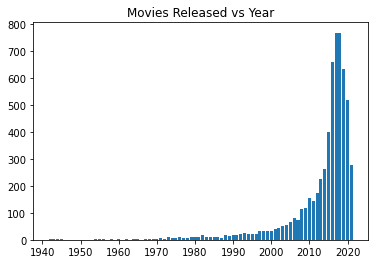

In [198]:
plt.bar(tmpm['release_year'],tmpm['title'])
plt.title('Movies Released vs Year')
plt.show()

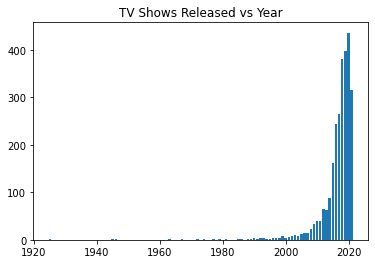

In [199]:
plt.bar(tmps['release_year'],tmps['title'])
plt.title('TV Shows Released vs Year')
plt.show()

Insights : 
The number of movies /TV shows released per year had significantly increased              over the past 20-30 years. A decline is observed during the year                2020 & 2021, the root cause could be pandemic outbreak.
         

# 3) Comparison of Tv shows vs. Movies. 

General Comparison of TV shows vs. Movies

In [200]:
mov2=df_final.groupby('type')['title'].nunique()
x=pd.DataFrame(mov2).reset_index()
x

,type,title
0,Movie,6131
1,TV Show,2676


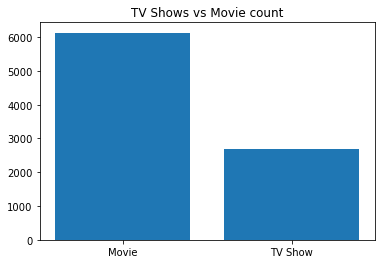

In [201]:
plt.bar(x['type'],x['title'])
plt.title('TV Shows vs Movie count')
plt.show()

Comparison of TV Shows vs Movies Country wise

In [202]:
mov3=df_final.groupby(['type','country'])['title'].nunique()
x=pd.DataFrame(mov3).sort_values('title',ascending=False).reset_index()
with pd.option_context('display.max_rows',None,'display.max_columns',None):
    print(x)

        type               country  title
0      Movie         United States   2752
1      Movie                 India    962
2    TV Show         United States    938
3      Movie        United Kingdom    534
4      Movie       Unknown Country    440
5    TV Show       Unknown Country    391
6      Movie                Canada    319
7      Movie                France    303
8    TV Show        United Kingdom    272
9    TV Show                 Japan    199
10     Movie               Germany    182
11     Movie                 Spain    171
12   TV Show           South Korea    170
13   TV Show                Canada    126
14     Movie                 Japan    119
15     Movie                 China    114
16     Movie                Mexico    111
17     Movie                 Egypt    102
18     Movie             Hong Kong    100
19     Movie               Nigeria     94
20     Movie             Australia     94
21   TV Show                France     90
22     Movie             Indonesia

In [203]:
tmp=pd.DataFrame(mov3).reset_index()
tmpm=tmp[tmp['type']=='Movie']
#tmpm
tmps=tmp[tmp['type']=='TV Show']

In [204]:
###Top Countries with highest Movie production.
x=pd.DataFrame(tmpm).reset_index()
with pd.option_context('display.max_rows',None,'display.max_columns',None):
    print(x.sort_values('title',ascending=False).head(10))
    
x=x.sort_values('title',ascending=False).head(10)

     index   type          country  title
111    111  Movie    United States   2752
42      42  Movie            India    962
110    110  Movie   United Kingdom    534
112    112  Movie  Unknown Country    440
19      19  Movie           Canada    319
33      33  Movie           France    303
35      35  Movie          Germany    182
98      98  Movie            Spain    171
50      50  Movie            Japan    119
22      22  Movie            China    114


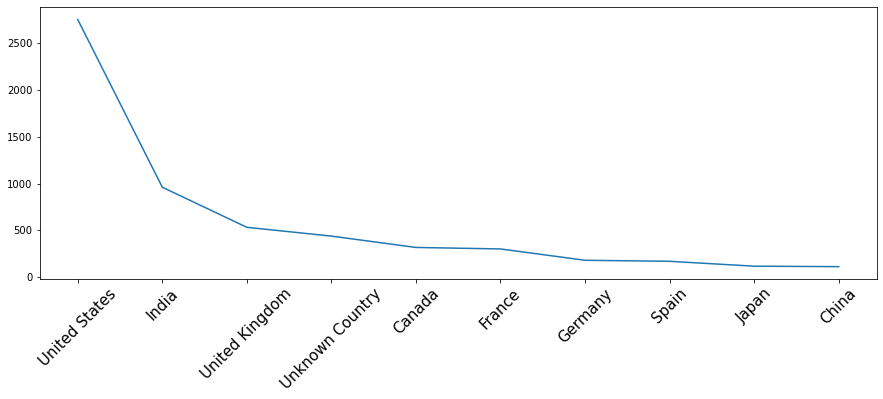

In [205]:
plt.figure(figsize=(5,5)).set_figwidth(15)
plt.plot(x['country'],x['title'])
plt.xticks(rotation=45,fontsize=15)
plt.show()

In [206]:
###Top Countries with highest TV Shows production.
with pd.option_context('display.max_rows',None,'display.max_columns',None):
    print(pd.DataFrame(tmps).sort_values('title',ascending=False).reset_index().head(10))
x=pd.DataFrame(tmps).sort_values('title',ascending=False).reset_index().head(10)

   index     type          country  title
0    182  TV Show    United States    938
1    183  TV Show  Unknown Country    391
2    181  TV Show   United Kingdom    272
3    149  TV Show            Japan    199
4    171  TV Show      South Korea    170
5    127  TV Show           Canada    126
6    138  TV Show           France     90
7    144  TV Show            India     84
8    176  TV Show           Taiwan     70
9    121  TV Show        Australia     66


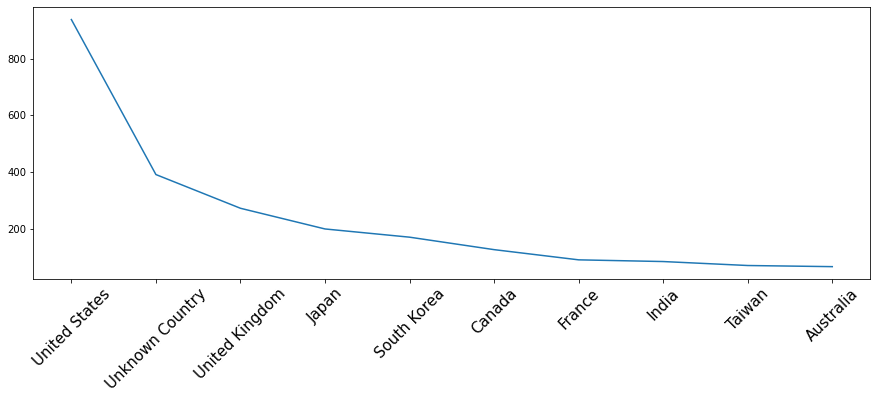

In [207]:
plt.figure(figsize=(5,5)).set_figwidth(15)
plt.plot(x['country'],x['title'])
plt.xticks(rotation=45,fontsize=15)
plt.show()

Insights:
For TV Shows: Countries like US, UK,Japan & South Korea produce the most of the TV Shows.
For Movies: Countries like US,India,UK,Canada & France produce the most movies.

 # What is the best time to launch a TV show?

In [208]:
#Best Week to Launch a TV Show
df_final['date_added'] = pd.to_datetime(df['date_added'], errors ='coerce')
df_final['week'] = df_final['date_added'].dt.week



C:\Users\Admin\AppData\Local\Temp\ipykernel_12440\1830399093.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_final['week'] = df_final['date_added'].dt.week


In [209]:
tv=df_final.groupby(['week','type'])['title'].nunique()
tmp=pd.DataFrame(tv).sort_values('title',ascending=False).reset_index()
tmpm=tmp[tmp['type']=='Movie']
#tmpm
tmps=tmp[tmp['type']=='TV Show']

In [210]:
x=pd.DataFrame(tmpm).reset_index()
with pd.option_context('display.max_rows',None,'display.max_columns',None):
    print(x.sort_values('title',ascending=False).head(10))
y=x.sort_values('title',ascending=False).head(10)

   index  week   type  title
0      0   1.0  Movie     58
1      1  44.0  Movie     57
2      2  13.0  Movie     47
3      3  31.0  Movie     47
4      4   9.0  Movie     46
5      5   5.0  Movie     45
6      6  35.0  Movie     44
7      7  26.0  Movie     44
8      8  48.0  Movie     42
9      9  18.0  Movie     42


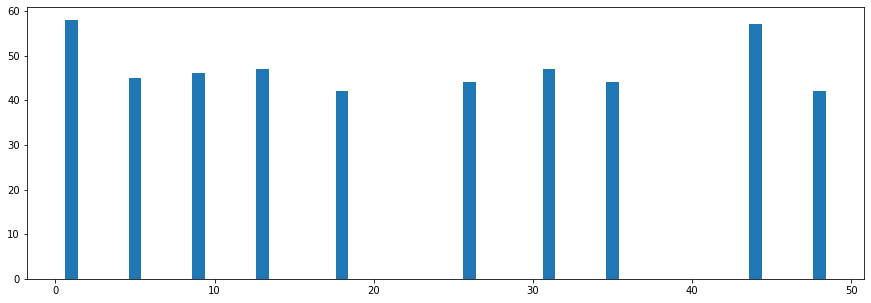

In [218]:
plt.figure(figsize=(5,5)).set_figwidth(15)
plt.bar(y['week'],y['title'])
plt.show()

In [26]:
with pd.option_context('display.max_rows',None,'display.max_columns',None):
    print(pd.DataFrame(tmps).sort_values('title',ascending=False).reset_index().head(10))
y=pd.DataFrame(tmps).sort_values('title',ascending=False).reset_index().head(10)

   index  week     type  title
0      9   1.0  TV Show     49
1     17  35.0  TV Show     38
2     23  44.0  TV Show     36
3     26  31.0  TV Show     36
4     27   9.0  TV Show     35
5     31  22.0  TV Show     33
6     33  26.0  TV Show     32
7     38   5.0  TV Show     31
8     40  50.0  TV Show     29
9     42  18.0  TV Show     29


In [ ]:
plt.figure(figsize=(5,5)).set_figwidth(15)
plt.plot(y['week'],y['title'])
plt.xticks(rotation=45,fontsize=15)
plt.show()

Insights: We can see the best week to release are week for movies are week 1, 44, 9, 40 etc
We observed that best week to launch TV Shows are week 1,35, 44, 31 etc

In [27]:
#Best Month to Launch a TV Show
df_final['month'] = df_final['date_added'].dt.month

In [31]:
tv=df_final.groupby(['month','type'])['title'].nunique()
tmp=pd.DataFrame(tv).sort_values('title',ascending=False).reset_index()
tmpm=tmp[tmp['type']=='Movie']
#tmpm
tmps=tmp[tmp['type']=='TV Show']

In [32]:
x=pd.DataFrame(tmpm).reset_index()
with pd.option_context('display.max_rows',None,'display.max_columns',None):
    print(x.sort_values('title',ascending=False).head(10))

   index  month   type  title
0      0    1.0  Movie    127
1      1    8.0  Movie    127
2      2   10.0  Movie    123
3      3    7.0  Movie    121
4      4    4.0  Movie    119
5      5    3.0  Movie    118
6      6    9.0  Movie    118
7      7   12.0  Movie    117
8      8   11.0  Movie    109
9      9    2.0  Movie    107


In [33]:
with pd.option_context('display.max_rows',None,'display.max_columns',None):
    print(pd.DataFrame(tmps).sort_values('title',ascending=False).reset_index().head(10))

   index  month     type  title
0     12   12.0  TV Show     76
1     13    1.0  TV Show     73
2     14    9.0  TV Show     73
3     15    3.0  TV Show     71
4     16    6.0  TV Show     70
5     17    8.0  TV Show     69
6     18    4.0  TV Show     69
7     19    5.0  TV Show     68
8     20    7.0  TV Show     64
9     21   10.0  TV Show     60


Insights: We can see the best months to release movies are January,August, October etc
We observed that best month to launch TV Shows are December, January, Septmeber, etc

# Analysis of actors/directors of different types of shows/movies.

In [40]:
#Casts whom have acted in several movies/Tv shows present in streamflix
tv=df_final.groupby(['cast'])['title'].nunique()
tmp=pd.DataFrame(tv).sort_values('title',ascending=False).reset_index()
tmp.head(10)

,cast,title
0,Unknown Actor,825
1,Anupam Kher,43
2,Shah Rukh Khan,35
3,Julie Tejwani,33
4,Naseeruddin Shah,32
5,Takahiro Sakurai,32
6,Rupa Bhimani,31
7,Om Puri,30
8,Akshay Kumar,30
9,Yuki Kaji,29


In [39]:
#Directors whom have directed several movies/Tv shows present in streamflix
tv=df_final.groupby(['director'])['title'].nunique()
tmp=pd.DataFrame(tv).sort_values('title',ascending=False).reset_index()
tmp.head(10)

,director,title
0,Unknown Director,2634
1,Rajiv Chilaka,22
2,Jan Suter,21
3,Raúl Campos,19
4,Marcus Raboy,16
5,Suhas Kadav,16
6,Jay Karas,15
7,Cathy Garcia-Molina,13
8,Jay Chapman,12
9,Martin Scorsese,12


Insights : We could see that Actors Like Shahrukh Khan,Anupam Kher,Julie have acted in several films present in Streamflix
Also, directors like Rajiv Chilaka, Jan Suter,Raul Compos have directed most movies/tv shows in streamflix

# Does Streamflix has more focus on TV Shows than movies in recent years

In [41]:
#The total movies & tv shows present in Streamflix
mov2=df_final.groupby('type')['title'].nunique()
pd.DataFrame(mov2).reset_index()


,type,title
0,Movie,6131
1,TV Show,2676


In [72]:
mov2=df_final.groupby(['release_year','type'])['title'].nunique()
tmp=pd.DataFrame(mov2).reset_index()
tmp1=tmp.pivot_table(values='title',index=tmp['release_year'],columns='type').reset_index()
tmp1.tail(10)

type,release_year,Movie,TV Show
64,2012,173.0,64.0
65,2013,225.0,63.0
66,2014,264.0,88.0
67,2015,398.0,162.0
68,2016,658.0,244.0
69,2017,767.0,265.0
70,2018,767.0,380.0
71,2019,633.0,397.0
72,2020,517.0,436.0
73,2021,277.0,315.0


Insights: According the above summarized data, it is evident that there are more no. of movies in streamflix than tv shows. We could see in the second summary table, Streamflix has shifted its focus on tv shows equivalent to that of movies.

# Understanding what content is available in different countries

In [117]:
#understanding the genre of the movie occuring the most
listed=df_final.groupby('listed_in')['title'].nunique()
tmp=pd.DataFrame(listed).sort_values('title',ascending=False).reset_index()
tmp.head(20)

,listed_in,title
0,International Movies,2752
1,Dramas,2427
2,Comedies,1674
3,International TV Shows,1351
4,Documentaries,869
5,Action & Adventure,859
6,TV Dramas,763
7,Independent Movies,756
8,Children & Family Movies,641
9,Romantic Movies,616


In [108]:
countries=df_final.groupby(['country','listed_in'])['title'].nunique()
tmp=pd.DataFrame(countries).sort_values('title',ascending=False).reset_index()
tmp.head(20)

,country,listed_in,title
0,India,International Movies,864
1,United States,Dramas,835
2,United States,Comedies,680
3,India,Dramas,662
4,United States,Documentaries,512
5,United States,Action & Adventure,404
6,United States,Independent Movies,390
7,United States,Children & Family Movies,390
8,India,Comedies,323
9,United States,Thrillers,292


In [109]:
tmp.tail(20)

,country,listed_in,title
1437,Malta,Dramas,1
1438,Malta,Romantic Movies,1
1439,Malta,TV Action & Adventure,1
1440,Malta,TV Dramas,1
1441,Malta,Thrillers,1
1442,Mauritius,Children & Family Movies,1
1443,Mauritius,Comedies,1
1444,Mauritius,International TV Shows,1
1445,Mauritius,TV Dramas,1
1446,Mexico,Classic Movies,1


Insights: We could observe that Genre such as International Movies,Dramas and Comedy movie/tvshows are having the highest count.
We could observe using the second summary, countries such as US, India & UK are having the highest distribution of these genres

# Recommendations
1) It would be better if Streamflix releases more movies/tv shows during holiday's or festive season(Christmas) to increase the profit
2) The Genre that Streamflix has most in it Comedy,International movie,Dramas, We recommend, releasing the movies/tv shows of this genre type
3)The potential customers are from US, India, Japan, UK.
4)Streamflix does need to focus equally on TV Shows, as they are growing in count rapidly in recent years
5)Actors such as Shahrukh Khan,Anupam Kher,Naseeruddin Shah & Akshay Kumar have a decent amount of movies.
